<a href="https://colab.research.google.com/github/Neha-J-m/Image-Classification/blob/main/MinorProject_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [50]:
#Preprocessing
from google.colab import drive
datadir = '/content/drive/MyDrive/SmartKnower/Minor Project/Images'

categories = ['Bikes', 'Cars']
images = []
target = []
flat_data = []

for i in categories:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_arr = imread(os.path.join(path, img))
        img_resize = resize(img_arr, (190,190,3))
        flat_data.append(img_resize.flatten())
        images.append(img_resize)
        target.append(i)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [51]:
#Splitting Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=65)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
para_grid ={'C':[1,10,100,1000],'kernel':['linear']}
            
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,para_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
y_pred=clf.predict(x_test)
y_pred

array(['Cars', 'Cars', 'Bikes', 'Cars', 'Cars', 'Cars', 'Bikes', 'Cars',
       'Bikes', 'Bikes', 'Cars', 'Cars', 'Cars', 'Cars', 'Cars', 'Bikes',
       'Cars', 'Bikes', 'Bikes', 'Cars', 'Cars', 'Cars', 'Bikes', 'Bikes',
       'Cars', 'Bikes', 'Bikes', 'Cars', 'Cars', 'Cars', 'Cars'],
      dtype='<U5')

In [54]:
y_test

array(['Cars', 'Cars', 'Bikes', 'Cars', 'Cars', 'Cars', 'Bikes', 'Cars',
       'Bikes', 'Bikes', 'Cars', 'Cars', 'Cars', 'Cars', 'Cars', 'Bikes',
       'Bikes', 'Bikes', 'Cars', 'Cars', 'Cars', 'Cars', 'Bikes', 'Cars',
       'Bikes', 'Cars', 'Bikes', 'Cars', 'Bikes', 'Cars', 'Cars'],
      dtype='<U5')

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.8064516129032258

In [56]:
confusion_matrix(y_pred,y_test)

array([[ 8,  3],
       [ 3, 17]])

In [57]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [58]:
model = pickle.load(open('img_model.p','rb'))

Enter image URL : https://img.etimg.com/thumb/msid-83425983,width-320,height-240/magazines/panache/this-car-crushes-elon-musk-says-tesla-model-s-plaid-is-faster-than-porsche-safer-than-volvo.jpg
(240, 320, 3)
 Predicted Output : ['Cars']


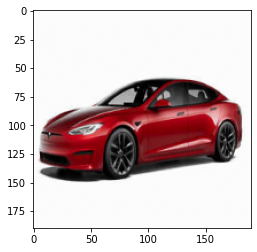

In [59]:
#real time testing
flat_data = []
url = input('Enter image URL : ')
img = imread(url)
img_resize = resize(img,(190,190,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
print(f' Predicted Output : {y_out}')